In [1]:
import numpy as np 
import pandas as pd 
import sklearn
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn
import keras

Using TensorFlow backend.


In [2]:
nom_column = ["Altitude","Orientation","Pente","Distance_he","Distance_ve","Distance_hr","Ombrage_9","Ombrage_12","Ombrage_15","Distance_hf"]
j = [4,40]
for i in j :
	if(i == 4):
		for x in range(4):
			nom_column.append("Wilderness")
	if(i == 40):
		for x in range(40):
			nom_column.append("Type_sol")

nom_column.append("Classe")

In [3]:
#Upload la data
data = pd.read_table("./covtype.data",names=nom_column,sep=",")

/home/kotama/.local/lib/python2.7/site-packages/pandas/io/parsers.py:678: UserWarning: Duplicate names specified. This will raise an error in the future.
  return _read(filepath_or_buffer, kwds)


In [4]:
data.describe()
#mean classe 2.051471 -> petit problme des familles + quartile problèmes, pblme taille classe

,Altitude,Orientation,Pente,Distance_he,Distance_ve,Distance_hr,Ombrage_9,Ombrage_12,Ombrage_15,Distance_hf,...,Type_sol.31,Type_sol.32,Type_sol.33,Type_sol.34,Type_sol.35,Type_sol.36,Type_sol.37,Type_sol.38,Type_sol.39,Classe
count,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,...,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000,581012.000000
mean,2959.365301,155.656807,14.103704,269.428217,46.418855,2350.146611,212.146049,223.318716,142.528263,1980.291226,...,0.090392,0.077716,0.002773,0.003255,0.000205,0.000513,0.026803,0.023762,0.015060,2.051471
std,279.984734,111.913721,7.488242,212.549356,58.295232,1559.254870,26.769889,19.768697,38.274529,1324.195210,...,0.286743,0.267725,0.052584,0.056957,0.014310,0.022641,0.161508,0.152307,0.121791,1.396504
min,1859.000000,0.000000,0.000000,0.000000,-173.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
25%,2809.000000,58.000000,9.000000,108.000000,7.000000,1106.000000,198.000000,213.000000,119.000000,1024.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000
50%,2996.000000,127.000000,13.000000,218.000000,30.000000,1997.000000,218.000000,226.000000,143.000000,1710.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
75%,3163.000000,260.000000,18.000000,384.000000,69.000000,3328.000000,231.000000,237.000000,168.000000,2550.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.000000
max,3858.000000,360.000000,66.000000,1397.000000,601.000000,7117.000000,254.000000,254.000000,254.000000,7173.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,7.000000


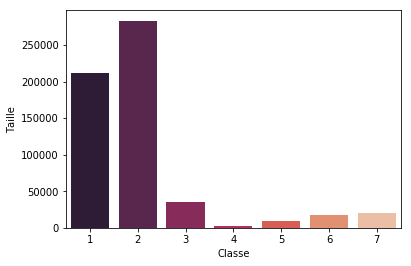

In [5]:
#Voir la taille de chaque classe
classe = data["Classe"].value_counts()
barplot=sns.barplot(classe.index,classe.values.tolist(),palette="rocket")
barplot.set_xlabel("Classe")
barplot.set_ylabel("Taille")
plt.show()
#On peut voir deséquilibre dans le jeu de donnée. NEED REEQUILIBRE 
#AVANT OU APRES SELECTION VARIABLE ?

In [6]:
#reduction de la taille de data
#1er méthode, enlevez en mode ballek

taille_min = min(data["Classe"].value_counts())
data = data.sort_values("Classe")


#Création nouveau dataset
dataset = data.iloc[0:taille_min-1,:]
data = data[data.Classe!=1]
data.reset_index()

for i in range(2,8):
    data.reset_index()
    dataset = dataset.append(data.iloc[0:taille_min-1,:])
    data = data[data.Classe!=int(i)]   


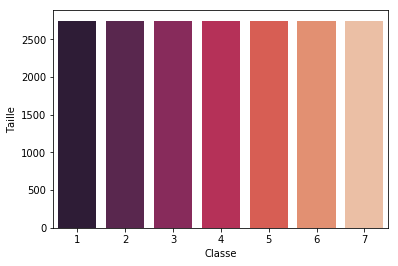

In [7]:
dataset = dataset.reset_index()

classe_dataset = dataset["Classe"].value_counts()

barplot=sns.barplot(classe_dataset.index,classe_dataset.values.tolist(),palette="rocket")
barplot.set_xlabel("Classe")
barplot.set_ylabel("Taille")
plt.show()

In [8]:
#SELECTION DE VARIABLES

#Un peu de statistique descriptives
dataset.describe()

,index,Altitude,Orientation,Pente,Distance_he,Distance_ve,Distance_hr,Ombrage_9,Ombrage_12,Ombrage_15,...,Type_sol.31,Type_sol.32,Type_sol.33,Type_sol.34,Type_sol.35,Type_sol.36,Type_sol.37,Type_sol.38,Type_sol.39,Classe
count,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,...,19222.000000,19222.000000,19222.000000,19222.000000,19222.000000,19222.0,19222.000000,19222.000000,19222.000000,19222.000000
mean,291236.988347,2772.243939,153.721465,17.597232,255.824940,52.602695,1737.556810,214.874259,218.752263,131.178545,...,0.044064,0.054781,0.005202,0.003746,0.000364,0.0,0.038029,0.035896,0.041671,4.000000
std,217391.291612,416.563291,103.905375,8.325882,221.368659,60.999660,1250.122974,29.971612,24.020587,47.694854,...,0.205243,0.227558,0.071941,0.061089,0.019080,0.0,0.191272,0.186037,0.199841,2.000052
min,1.000000,1889.000000,0.000000,0.000000,0.000000,-134.000000,30.000000,0.000000,95.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,1.000000
25%,12966.250000,2457.000000,72.000000,11.000000,85.000000,4.000000,738.000000,196.000000,206.000000,101.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,2.000000
50%,296580.500000,2783.000000,129.000000,17.000000,212.000000,37.000000,1434.000000,222.000000,223.000000,133.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,4.000000
75%,531666.750000,3139.000000,231.000000,23.000000,366.000000,86.000000,2469.000000,238.000000,237.000000,165.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,0.000000,0.000000,6.000000
max,581009.000000,3849.000000,360.000000,51.000000,1294.000000,403.000000,5932.000000,254.000000,254.000000,250.000000,...,1.000000,1.000000,1.000000,1.000000,1.000000,0.0,1.000000,1.000000,1.000000,7.000000


In [9]:
#on voit de Type_sol36 est égale à 0, allez on drop
dataset = dataset.drop(["index","Type_sol.36"],axis=1)

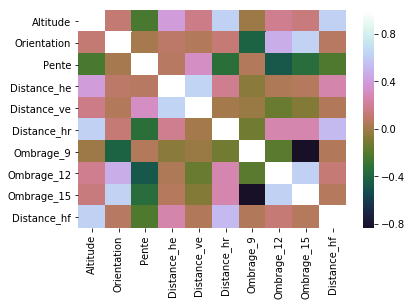

In [10]:
#Petite matrice de corrélation pour detecter liaisons entre certaines variables -> feature engineer ?
mat_corr= dataset.iloc[:,:10].corr(method="spearman")
sns.heatmap(mat_corr,cmap="cubehelix",center=0)
plt.show()

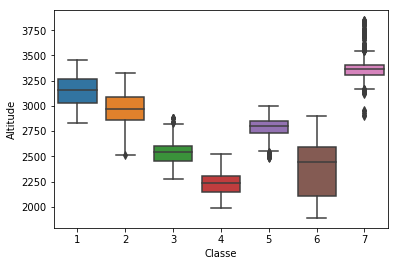

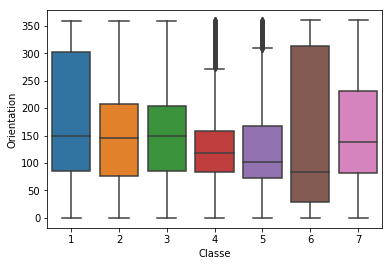

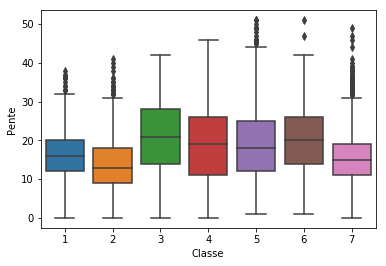

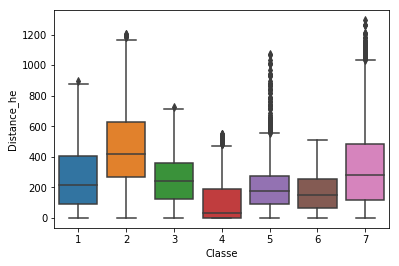

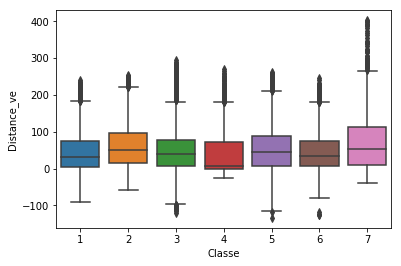

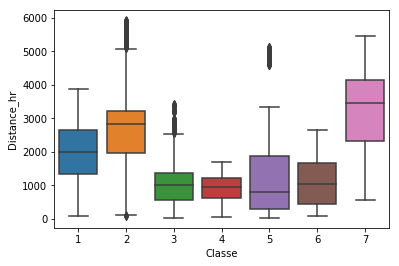

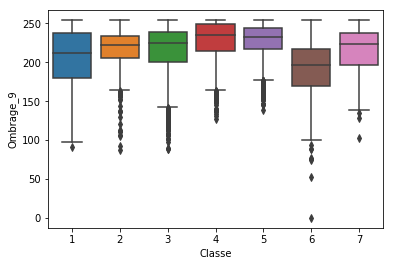

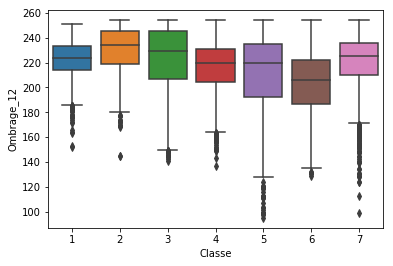

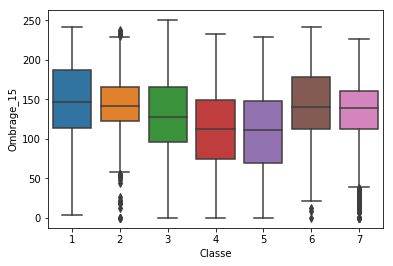

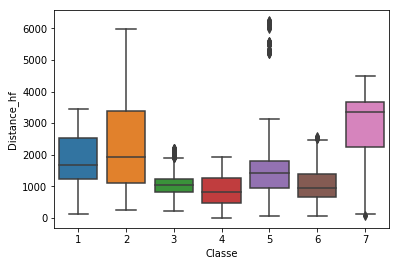

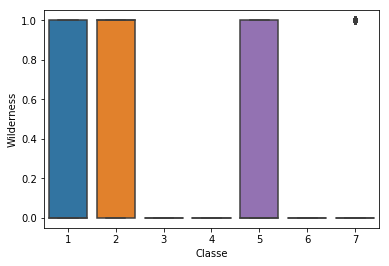

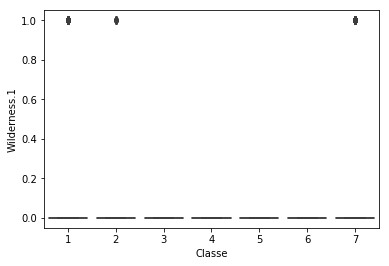

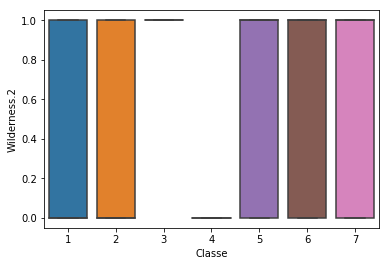

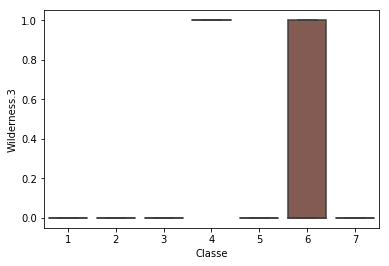

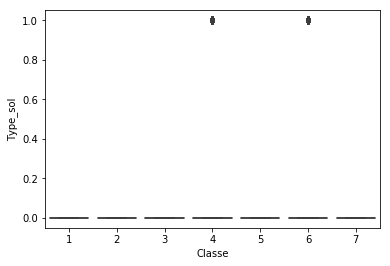

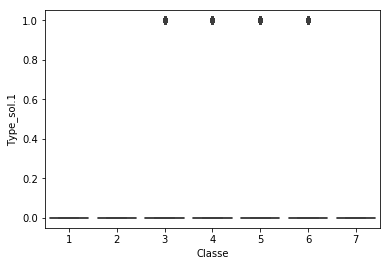

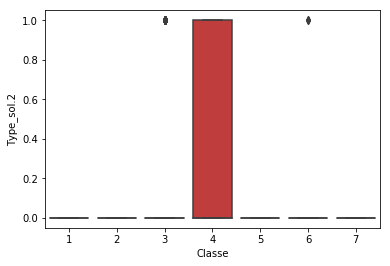

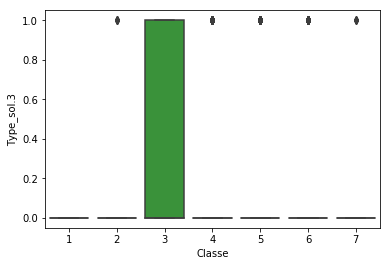

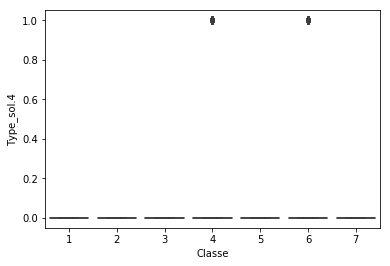

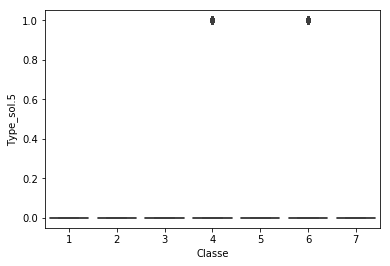

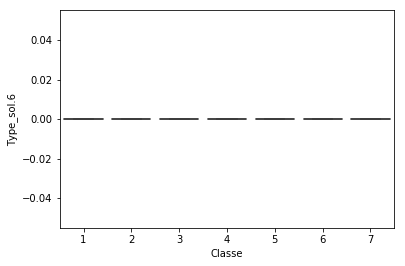

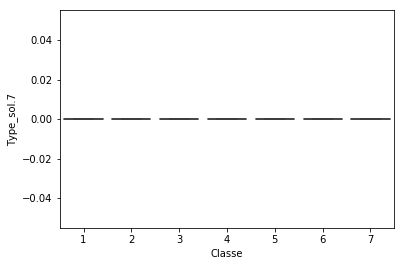

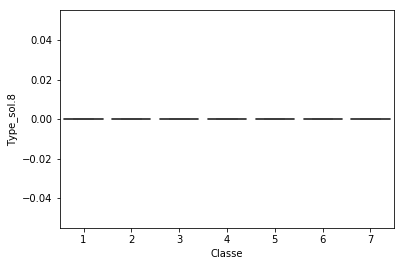

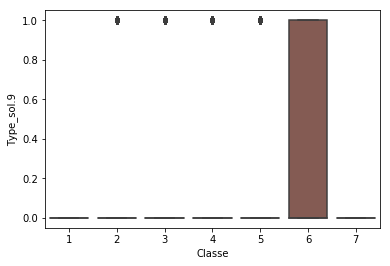

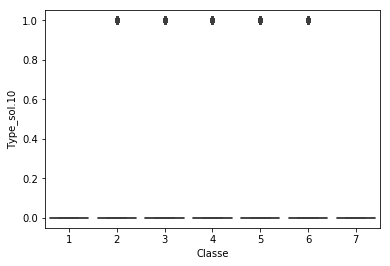

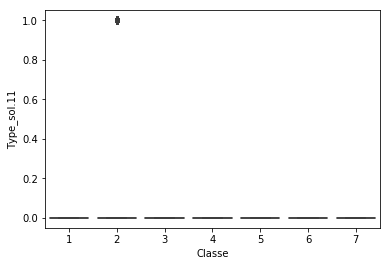

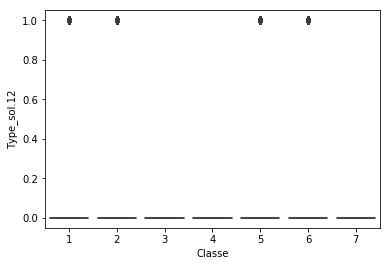

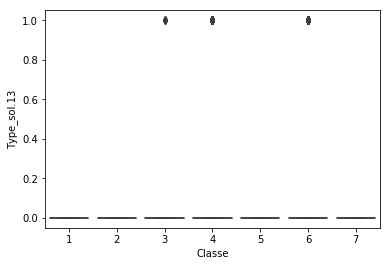

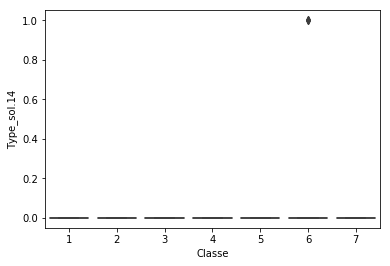

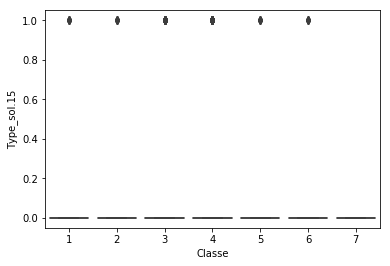

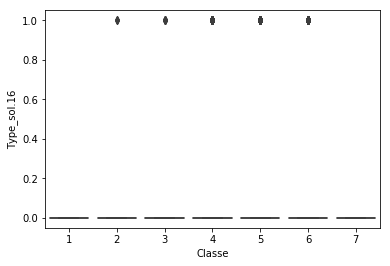

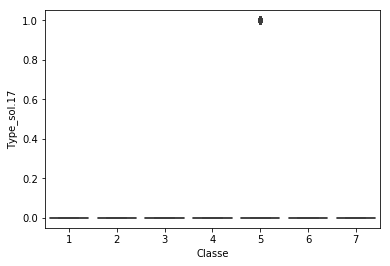

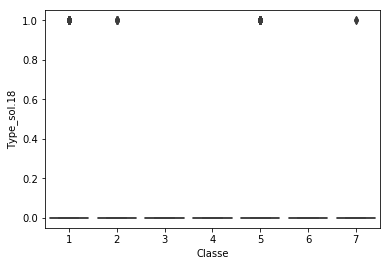

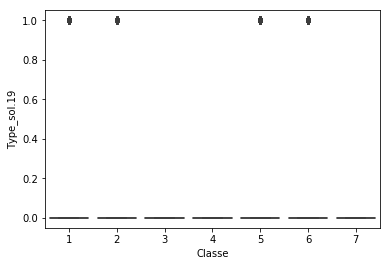

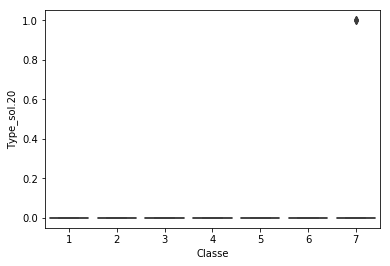

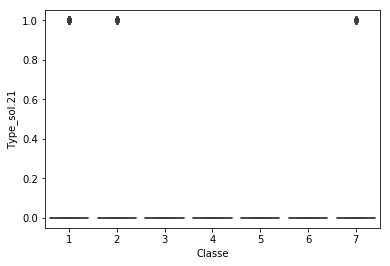

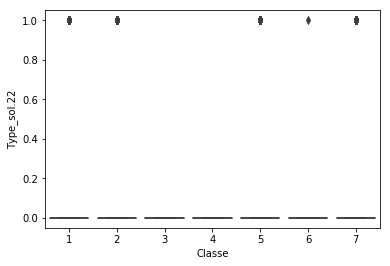

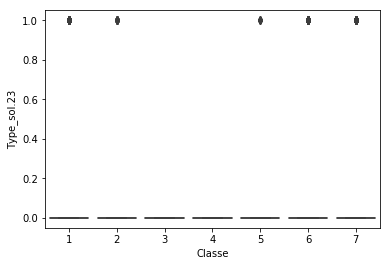

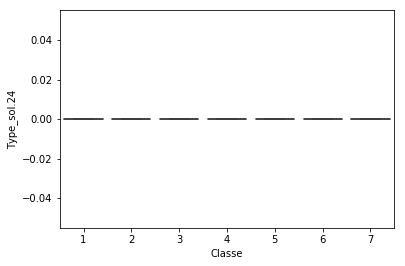

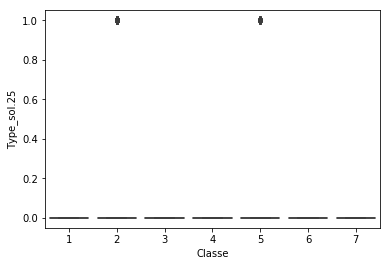

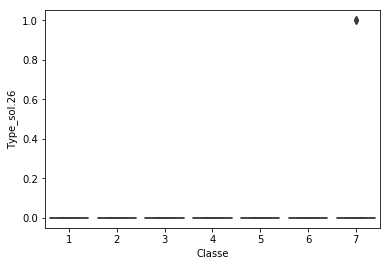

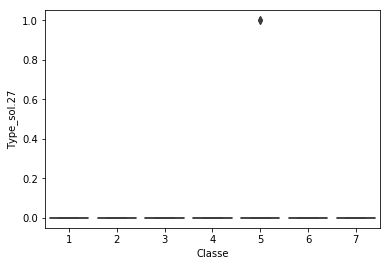

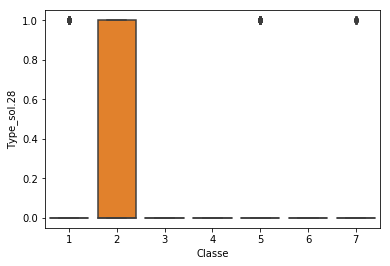

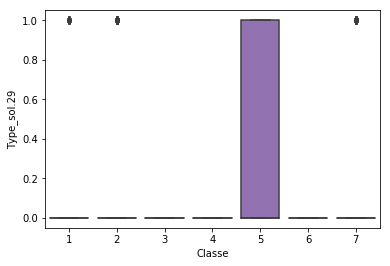

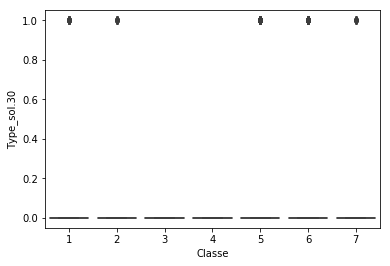

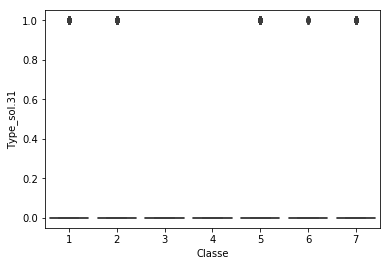

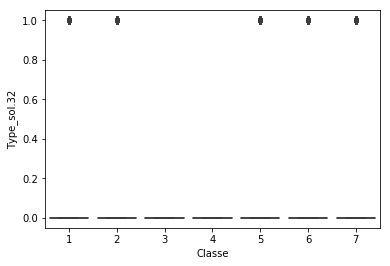

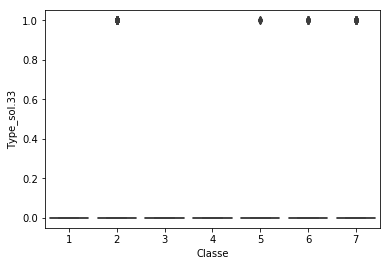

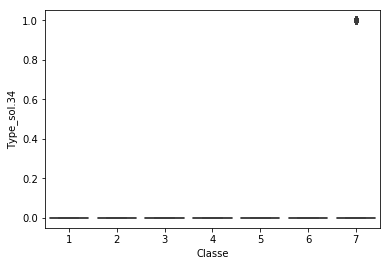

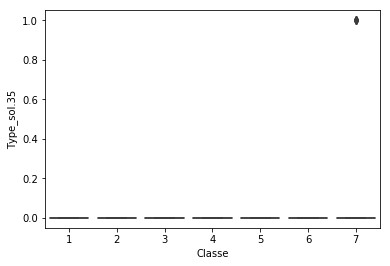

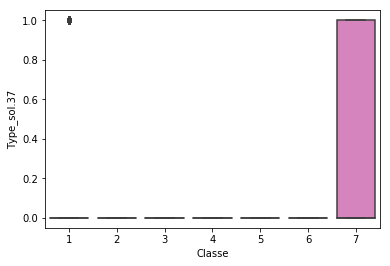

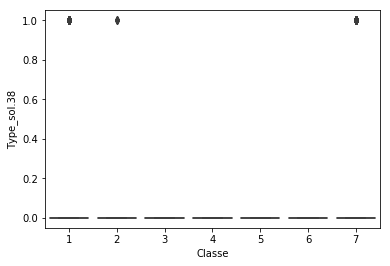

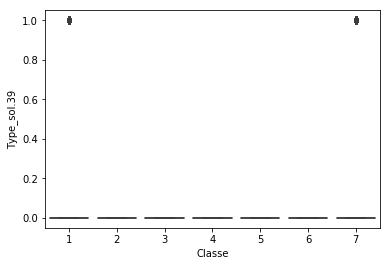

In [11]:
#Forte corrélation:
#Altitude - Distance_hr
#Altitude - Distance_hf
#Orientation - Ombrage_15
#Distance_hr - Distance_hf
#Distance_ve - Distance_he
#Ombrage_15 - Ombrage_12

#Go pour des boxplot sur c'est variable

variables = dataset.columns

tmp = len(variables)-1
x = dataset.Classe
y = variables[0:tmp]


for i in range(0,tmp):
    sns.boxplot(data = dataset,x=x,y=y[i])
    plt.show()

In [12]:
from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import cross_val_predict
from sklearn.neighbors import KNeighborsClassifier


In [21]:
#Altitude boxplot bien séparer -> Bonne variable


#Un peu de ML et de pred

data_train = dataset[variables]
X = data_train.iloc[:,0:tmp]

#NORAMALISATION DES DONNEES
x = X.values
min_max_scaler = preprocessing.MinMaxScaler()
x_scaled = min_max_scaler.fit_transform(x)
X_norm = pd.DataFrame(x_scaled)


y = data_train.Classe

x_train,x_test,y_train,y_test = train_test_split(X_norm,y,train_size=0.2)

In [22]:
model = LogisticRegression(solver="lbfgs",multi_class="multinomial").fit(x_train,y_train)

In [26]:
print(model.predict(x_test))
print("LogReg_norm Accuracy: %0.2f " % (model.score(x_test,y_test)))

[1 2 3 ... 1 3 7]
LogReg_norm Accuracy: 0.85 


In [27]:
model2 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)

In [28]:
print(model2.predict(x_test))
print("KNN Accuracy: %0.2f " % (model2.score(x_test,y_test)))
#Baisse du scoe avecnormalisation des données

[1 2 3 ... 1 3 7]
KNN Accuracy: 0.94 


In [29]:
data_train = dataset[variables]
X = data_train.iloc[:,0:tmp]
y = data_train.Classe
x_train,x_test,y_train,y_test = train_test_split(X,y,train_size=0.2)

In [30]:
model3 = KNeighborsClassifier(n_neighbors=3).fit(x_train,y_train)
print("KNN Accuracy: %0.2f " % (model3.score(x_test,y_test)))

KNN Accuracy: 0.96 
